# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Построим модель для задачи классификации, которая выберет подходящий тариф.

Задача - построить модель с максимально большим значением *accuracy*. Необходимо довести долю правильных ответов до 0.75. Проверим *accuracy* на тестовой выборке самостоятельно. Проверим адекватность построенных моделей.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файл" data-toc-modified-id="Откроем-и-изучим-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем и изучим файл</a></span></li><li><span><a href="#Исследуем-мультиколлинеарность-факторов/признаков-датасета" data-toc-modified-id="Исследуем-мультиколлинеарность-факторов/признаков-датасета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследуем мультиколлинеарность факторов/признаков датасета</a></span></li><li><span><a href="#Разобьем-данные-на-выборки" data-toc-modified-id="Разобьем-данные-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разобьем данные на выборки</a></span></li><li><span><a href="#Исследуем-модели" data-toc-modified-id="Исследуем-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследуем модели</a></span><ul class="toc-item"><li><span><a href="#Подготовим-данные-для-обучения-и-теста-на-валидационной-выборке" data-toc-modified-id="Подготовим-данные-для-обучения-и-теста-на-валидационной-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовим данные для обучения и теста на валидационной выборке</a></span></li><li><span><a href="#Модель-на-основе-алгоритма-DecisionTreeClassifier" data-toc-modified-id="Модель-на-основе-алгоритма-DecisionTreeClassifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель на основе алгоритма DecisionTreeClassifier</a></span></li><li><span><a href="#Модель-на-основе-алгоритма-RandomForestClassifier" data-toc-modified-id="Модель-на-основе-алгоритма-RandomForestClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель на основе алгоритма RandomForestClassifier</a></span></li><li><span><a href="#Модель-на-основе-алгоритма-LogisticRegression" data-toc-modified-id="Модель-на-основе-алгоритма-LogisticRegression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Модель на основе алгоритма LogisticRegression</a></span></li></ul></li><li><span><a href="#Проверим-модели-на-тестовой-выборке" data-toc-modified-id="Проверим-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверим модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Подготовим-данные-для-теста-на-тестовой-выборке" data-toc-modified-id="Подготовим-данные-для-теста-на-тестовой-выборке-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовим данные для теста на тестовой выборке</a></span></li><li><span><a href="#Проверим-модель-на-основе-алгоритма-DecisionTreeClassifier-на-тестовой-выборке" data-toc-modified-id="Проверим-модель-на-основе-алгоритма-DecisionTreeClassifier-на-тестовой-выборке-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверим модель на основе алгоритма DecisionTreeClassifier на тестовой выборке</a></span></li><li><span><a href="#Проверим-модель-на-основе-алгоритма-RandomForestClassifier-на-тестовой-выборке" data-toc-modified-id="Проверим-модель-на-основе-алгоритма-RandomForestClassifier-на-тестовой-выборке-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверим модель на основе алгоритма RandomForestClassifier на тестовой выборке</a></span></li><li><span><a href="#Проверим-модель-на-основе-алгоритма-LogisticRegression-на-тестовой-выборке" data-toc-modified-id="Проверим-модель-на-основе-алгоритма-LogisticRegression-на-тестовой-выборке-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Проверим модель на основе алгоритма LogisticRegression на тестовой выборке</a></span></li><li><span><a href="#Сравнение-результатов-работы-моделей-и-вывод" data-toc-modified-id="Сравнение-результатов-работы-моделей-и-вывод-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Сравнение результатов работы моделей и вывод</a></span></li></ul></li><li><span><a href="#Проверим-модели-на-адекватность" data-toc-modified-id="Проверим-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверим модели на адекватность</a></span><ul class="toc-item"><li><span><a href="#Сравним-модели-с-простейшей-моделью-наивного-байесовского-метода(Naive-Bayes)" data-toc-modified-id="Сравним-модели-с-простейшей-моделью-наивного-байесовского-метода(Naive-Bayes)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Сравним модели с простейшей моделью наивного байесовского метода(Naive Bayes)</a></span></li><li><span><a href="#Cделаем-оценку-и-сравнение-моделей-по-метрикам-Precision,--Recall,-F1-score." data-toc-modified-id="Cделаем-оценку-и-сравнение-моделей-по-метрикам-Precision,--Recall,-F1-score.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Cделаем оценку и сравнение моделей по метрикам Precision,  Recall, F1 score.</a></span></li></ul></li></ul></div>

## Откроем и изучим файл

In [162]:
# импорт необходимых для проекта библиотек
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # импорт структуры данных классификации дерева решений
from sklearn.ensemble import RandomForestClassifier # импорт алгоритма классификации - случайный лес
from sklearn.linear_model import LogisticRegression # импорт алгоритма логистической регрессии
from sklearn.metrics import accuracy_score # импорт метрики для проверки доли правельных ответов
from sklearn.model_selection import train_test_split # импортируюм функцию для разбивки датасета на обучающую, валидационную и тестовую выборки
from sklearn.naive_bayes import GaussianNB # импорт алгоритма наивного байесовского классификатора
from sklearn.metrics import precision_score, recall_score # импорт дополнительных метрик для оценки адекватности моделей: точность, полнота
from sklearn.metrics import f1_score # F-мера
import warnings # для удаления незначительных предупреждений
import matplotlib.pyplot as plt # импорт библиотеки для создания графиков

In [163]:
# убираем незначительные предупреждения
warnings.filterwarnings('ignore')

In [164]:
# убираем лимиты на максимальное количество отображаемых данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [165]:
# чтение и изучение файла
df = pd.read_csv('/datasets/users_behavior.csv')
print('Head')
display(df.head(10))
print('Tail')
display(df.tail(10))
print('Info')
display(df.info())
print('Described info')
display(df.describe())
print('About distribution')
display(df['is_ultra'].value_counts())

Head


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Tail


,calls,minutes,messages,mb_used,is_ultra
3204,86.0,658.66,47.0,14153.10,0
3205,59.0,412.81,16.0,14105.03,0
3206,76.0,586.51,54.0,14345.74,0
3207,17.0,92.39,2.0,4299.25,0
3208,164.0,1016.98,71.0,17787.52,1
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

Described info


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


About distribution


0    2229
1     985
Name: is_ultra, dtype: int64

В общем датасете 3214 строк уникальных пользователей. Все строки данных заполнены данными, нулевых значений не обнаружено. 
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
   - сalls — количество звонков,
   - minutes — суммарная длительность звонков в минутах,
   - messages — количество sms-сообщений,
   - mb_used — израсходованный интернет-трафик в Мб,
   - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Категорий всего 2(бинарная(двоичная) классификация), поэтому будут использованы модели для задачи классификации, которая выберет подходящий тариф.

## Исследуем мультиколлинеарность факторов/признаков датасета

Корреляция между сalls и minutes: 0.9820832355742293


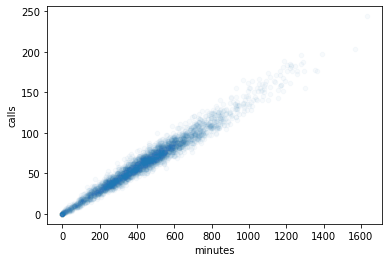

Корреляция между сalls и messages: 0.17738450121769536


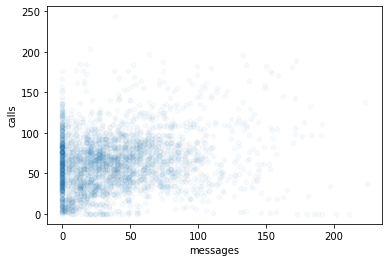

Корреляция между сalls и mb_used: 0.28644151203505447


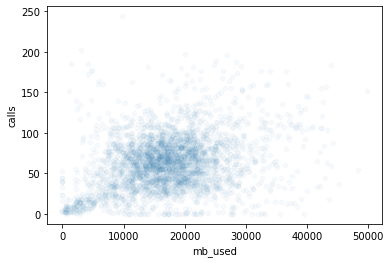

Корреляция между minutes и messages: 0.1731102258096908


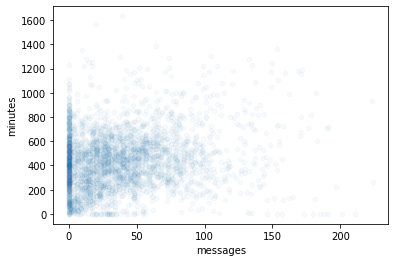

Корреляция между minutes и mb_used: 0.28096693508821474


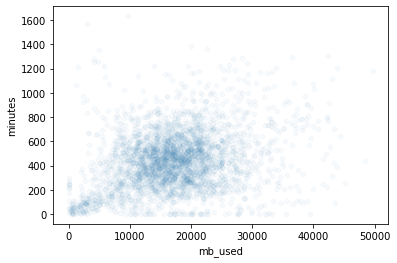

Корреляция между messages и mb_used: 0.19572112095582153


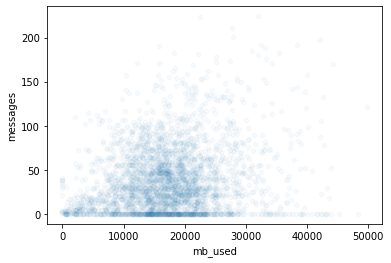

In [166]:
# проверим корреляцию между признаками вычислив коэффициент корреляции Пирсона: сalls, minutes, messages, mb_used
# корреляция между сalls и minutes
print('Корреляция между сalls и minutes:', df['calls'].corr(df['minutes']))
df.sort_values('calls').plot(x='minutes', y='calls',kind='scatter', alpha=0.03)
plt.show()
# корреляция между сalls и messages
print('Корреляция между сalls и messages:', df['calls'].corr(df['messages']))
df.sort_values('calls').plot(x='messages', y='calls',kind='scatter', alpha=0.03)
plt.show()
# корреляция между сalls и mb_used
print('Корреляция между сalls и mb_used:', df['calls'].corr(df['mb_used']))
df.sort_values('calls').plot(x='mb_used', y='calls',kind='scatter', alpha=0.03)
plt.show()
# корреляция между minutes и messages
print('Корреляция между minutes и messages:', df['minutes'].corr(df['messages']))
df.sort_values('minutes').plot(x='messages', y='minutes',kind='scatter', alpha=0.03)
plt.show()
# корреляция между minutes и mb_used
print('Корреляция между minutes и mb_used:', df['minutes'].corr(df['mb_used']))
df.sort_values('minutes').plot(x='mb_used', y='minutes',kind='scatter', alpha=0.03)
plt.show()
# корреляция между messages и mb_used
print('Корреляция между messages и mb_used:', df['messages'].corr(df['mb_used']))
df.sort_values('messages').plot(x='mb_used', y='messages',kind='scatter', alpha=0.03)
plt.show()

По итогам анализа признаков на предмет мультиколлинеарности были расчитаны коэффициенты корреляции Пирсона между каждым из признаков. Признаки с наибольшей корреляцией 0.98 - сalls и minutes, поэтому примем решение убрать признак calls при дальнейшем расчете моделей с целью исключения возможного переобучения(с отсутствующим признаком сalls). Уберем calls, а не minutes, т.к. тарификацию операторы не производят по количетсву звонков, количество влияет в механике округления каждого из звонков, но в данном случае анализ округленных и не округленных звонков не производим.

In [167]:
# уберем из датафрейма df столбец calls, чтобы наши модели пересчитались с учетом оставшегося перечня признаков
df = df.drop(['calls'], axis=1)
display(df.info())
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 4 columns):
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(3), int64(1)
memory usage: 100.6 KB


None

Index(['minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

## Разобьем данные на выборки

In [168]:
# разобьем выборку на две части: тренировочная выборка - 60%, тестовая и валидационная выборка - 40% 
df_train, df_valid_test = train_test_split(df, test_size=0.4, random_state=782347)
# разобьем выборку df_valid_test на две части: валидационная выборка - 50%, тестовая выборка - 50%
df_test, df_valid = train_test_split(df_valid_test, test_size=0.5, random_state=782347)
# проверим, что получилось
print('Training sample')
display(df_train.info())
print('Valid sample')
display(df_valid.info())
print('Test sample')
display(df_test.info())

Training sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 93 to 7
Data columns (total 4 columns):
minutes     1928 non-null float64
messages    1928 non-null float64
mb_used     1928 non-null float64
is_ultra    1928 non-null int64
dtypes: float64(3), int64(1)
memory usage: 75.3 KB


None

Valid sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2795 to 3010
Data columns (total 4 columns):
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(3), int64(1)
memory usage: 25.1 KB


None

Test sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 3004 to 2710
Data columns (total 4 columns):
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(3), int64(1)
memory usage: 25.1 KB


None

Отсутствует спрятанная тестовая выборка, поэтому данные разбиты на 3 части: обучающую, валидационную, тестовую. Размеры тестового и валидационного наборов сделали равными. Исходные данные разбиты  в два этапа в соотношении 3:1:1.

## Исследуем модели

### Подготовим данные для обучения и теста на валидационной выборке

In [169]:
# данные для тренировки на тренировочной выборке
df_train_features = df_train.drop(['is_ultra'], axis=1)
df_train_target = df_train['is_ultra']
# данные для проверки на валидационной выборке
df_valid_features = df_valid.drop(['is_ultra'], axis=1)
df_valid_target = df_valid['is_ultra']

### Модель на основе алгоритма DecisionTreeClassifier

In [170]:
# посмотрим как ведет себя модель при разной глубине дерева
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 40):
    # инициализируем модель
    model_dtc = DecisionTreeClassifier(random_state=782347, max_depth=depth)
    # обучим модель на тренировочной выборке
    model_dtc.fit(df_train_features, df_train_target)
    # протестируем модель на тренировочной выборке
    recieved_tariff_df_train = model_dtc.predict(df_train_features)
    # протестируем модель на валидационной выборке
    recieved_tariff_df_valid = model_dtc.predict(df_valid_features)
    # получим результат - оценка правильности модели при определенной глубине дерева
    result_train = accuracy_score(df_train_target, recieved_tariff_df_train)
    result_valid = accuracy_score(df_valid_target, recieved_tariff_df_valid)
    print('max_depth =', depth)
    print('Accuracy score train:', result_train)
    print('Accuracy score valid:', result_valid)
    if result_valid > best_result:
        best_model = model_dtc
        best_result = result_valid
        best_depth = depth
        
# посчитаем правильные ответы при тестировании на валидационной выборке
print('Accuracy лучшей модели на валидационной выборке:', best_result)
print('Глубина при наилучшем accuracy на валидационной выборке:', best_depth)

max_depth = 1
Accuracy score train: 0.745850622406639
Accuracy score valid: 0.7262830482115086
max_depth = 2
Accuracy score train: 0.7759336099585062
Accuracy score valid: 0.7620528771384136
max_depth = 3
Accuracy score train: 0.7909751037344398
Accuracy score valid: 0.7791601866251944
max_depth = 4
Accuracy score train: 0.8018672199170125
Accuracy score valid: 0.7822706065318819
max_depth = 5
Accuracy score train: 0.8060165975103735
Accuracy score valid: 0.7667185069984448
max_depth = 6
Accuracy score train: 0.816908713692946
Accuracy score valid: 0.7527216174183515
max_depth = 7
Accuracy score train: 0.8314315352697096
Accuracy score valid: 0.7744945567651633
max_depth = 8
Accuracy score train: 0.8438796680497925
Accuracy score valid: 0.7636080870917574
max_depth = 9
Accuracy score train: 0.8641078838174274
Accuracy score valid: 0.7698289269051322
max_depth = 10
Accuracy score train: 0.8838174273858921
Accuracy score valid: 0.7651632970451011
max_depth = 11
Accuracy score train: 0.89

Если охарактеризовать результаты модели на основе алгоритма DecisionTreeClassifier, то правильность лучшей модели с глубиной 4 составила на валидационной выборке 0.7822706065318819, что выше заданного условия, поэтому следует протестировать модель на тестовой выборке и сравнить с результатами других моделей. Следует отметить, что при глубине дерева со значением 31 правильность модели составляет 1, но правильность модели на валидационной выборке только 0.7325038880248833, что ниже, чем при глубине дерева 4.

### Модель на основе алгоритма RandomForestClassifier

In [171]:
# посмотрим как себя ведет модель при разном количестве деревьев
best_model = None
best_result = 0
best_est = 0
for est in range(1, 100):
    model_rfc = RandomForestClassifier(random_state=782347, n_estimators=est)
    model_rfc.fit(df_train_features, df_train_target)
    recieved_tariff_df_train = model_rfc.predict(df_train_features)
    recieved_tariff_df_valid = model_rfc.predict(df_valid_features)
    result_train = accuracy_score(df_train_target, recieved_tariff_df_train)
    result_valid = accuracy_score(df_valid_target, recieved_tariff_df_valid)
    print('estimators =', est)
    print('Accuracy score train:', result_train)
    print('Accuracy score valid:', result_valid)
    if result_valid > best_result:
        best_model = model_rfc
        best_result = result_valid
        best_est = est
        
print('Accuracy лучшей модели на валидационной выборке:', best_result)
print('Количество деревьев при наилучшем accuracy на валидационной выборке:', best_est)

estimators = 1
Accuracy score train: 0.9004149377593361
Accuracy score valid: 0.6998444790046656
estimators = 2
Accuracy score train: 0.9050829875518672
Accuracy score valid: 0.7636080870917574
estimators = 3
Accuracy score train: 0.9517634854771784
Accuracy score valid: 0.7589424572317263
estimators = 4
Accuracy score train: 0.946058091286307
Accuracy score valid: 0.7542768273716952
estimators = 5
Accuracy score train: 0.9673236514522822
Accuracy score valid: 0.7511664074650077
estimators = 6
Accuracy score train: 0.9626556016597511
Accuracy score valid: 0.7651632970451011
estimators = 7
Accuracy score train: 0.9813278008298755
Accuracy score valid: 0.7636080870917574
estimators = 8
Accuracy score train: 0.9730290456431535
Accuracy score valid: 0.7636080870917574
estimators = 9
Accuracy score train: 0.9823651452282157
Accuracy score valid: 0.7636080870917574
estimators = 10
Accuracy score train: 0.9818464730290456
Accuracy score valid: 0.7636080870917574
estimators = 11
Accuracy score

Если охарактеризовать результаты модели на основе алгоритма RandomForestClassifier, то правильность лучшей модели с количеством деревьев 40 составила на валидационной выборке 0.7931570762052877, что выше заданного условия, поэтому следует протестировать модель на тестовой выборке и сравнить с результатами других моделей. Следует отметить, что при количестве деревьев со значением 79 правильность модели ближайшая к 1, но правильность модели на валидационной выборке только 0.7807153965785381, что ниже, чем при количестве деревьев 40.

### Модель на основе алгоритма LogisticRegression

In [172]:
model_lr = LogisticRegression(random_state=782347)
model_lr.fit(df_train_features, df_train_target)
recieved_tariff_df_train = model_lr.predict(df_train_features)
recieved_tariff_df_valid = model_lr.predict(df_valid_features)
result_train = accuracy_score(df_train_target, recieved_tariff_df_train)
result_valid = accuracy_score(df_valid_target, recieved_tariff_df_valid)
print('Accuracy модели на обучающей выборке:', result_train)
print('Accuracy модели на валидационной выборке:', result_valid)

Accuracy модели на обучающей выборке: 0.7043568464730291
Accuracy модели на валидационной выборке: 0.7076205287713841


Если охарактеризовать результаты модели на основе алгоритма LogisticRegression, то правильность модели составила на валидационной выборке 0.7076205287713841, что ниже заданного целевого условия, поэтому следует протестировать модель на тестовой выборке и сравнить с результатами других моделей. Следует отметить, что правильность модели на обучающей выборке 0.7043568464730291.

## Проверим модели на тестовой выборке

 ### Подготовим данные для теста на тестовой выборке

In [173]:
# формирование тестовой выборки без целевого параметра
df_test_features = df_test.drop(['is_ultra'], axis=1)
# сохранение целевого параметра для сравнения
df_test_target = df_test['is_ultra']

### Проверим модель на основе алгоритма DecisionTreeClassifier на тестовой выборке

In [174]:
# проверка модели с алгоритмом DecisionTreeClassifier на тестовой выборке по лучшей глубине, вывод accuracy
# инициализация модели с наилучшей глубиной 4 на валидационной выборке
model_dtc_best_depth = DecisionTreeClassifier(random_state=782347, max_depth=4)
# обучим модель на тренировочной выборке
model_dtc_best_depth.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test_dtc = model_dtc_best_depth.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy лучшей модели по глубине на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test_dtc))

Accuracy лучшей модели по глубине на тестовой выборке: 0.8351477449455676


In [175]:
# проверка модели с алгоритмом DecisionTreeClassifier на тестовой выборке по максимальной рабочей глубине, вывод accuracy
# инициализация модели с максимальной глубиной 31 на валидационной выборке
model_dtc_max_depth = DecisionTreeClassifier(random_state=782347, max_depth=31)
# обучим модель на тренировочной выборке
model_dtc_max_depth.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test = model_dtc_max_depth.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy модели по максимальной глубине на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test))

Accuracy модели по максимальной глубине на тестовой выборке: 0.7107309486780715


In [176]:
# проверка модели с алгоритмом DecisionTreeClassifier на тестовой выборке по минимальной рабочей глубине, вывод accuracy
# инициализация модели с глубиной 1
model_dtc_min_depth = DecisionTreeClassifier(random_state=782347, max_depth=1)
# обучим модель на тренировочной выборке
model_dtc_min_depth.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test = model_dtc_min_depth.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy модели по минимальной глубине на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test))

Accuracy модели по минимальной глубине на тестовой выборке: 0.7931570762052877


Для дальнейшего рассмотрения возьмем вмодель с глубиной 4, т.к. были получены максимальные значения accuracy на валидационной выборке 0.7822706065318819 и на тестовой выборке 0.8351477449455676. Для справки - весьма неплохой показатель accuracy дала модель с минимальной глубиной 1 - 0.7931570762052877.

### Проверим модель на основе алгоритма RandomForestClassifier на тестовой выборке

In [177]:
# проверка модели с алгоритмом RandomForestClassifier на тестовой выборке по лучшей модели с количеством деревьев 40, вывод accuracy
# инициализация модели
model_rfc_best_est = RandomForestClassifier(random_state=782347, n_estimators=40)
# обучим модель на тренировочной выборке
model_rfc_best_est.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test_rfc = model_rfc_best_est.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy лучшей модели по количеству деревьев на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test_rfc))

Accuracy лучшей модели по количеству деревьев на тестовой выборке: 0.8055987558320373


In [178]:
# проверка модели с алгоритмом RandomForestClassifier на тестовой выборке по максимальному количеству деревьев 79, вывод accuracy
# инициализация модели
model_rfc_max_est = RandomForestClassifier(random_state=782347, n_estimators=79)
# обучим модель на тренировочной выборке
model_rfc_max_est.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test = model_rfc_max_est.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy модели по максимальному количеству деревьев на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test))

Accuracy модели по максимальному количеству деревьев на тестовой выборке: 0.8040435458786936


In [179]:
# проверка модели с алгоритмом RandomForestClassifier на тестовой выборке по минимальному количеству деревьев 1, вывод accuracy
# инициализация модели
model_rfc_min_est = RandomForestClassifier(random_state=782347, n_estimators=1)
# обучим модель на тренировочной выборке
model_rfc_min_est.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test = model_rfc_min_est.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy модели по минимальному количеству деревьев на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test))

Accuracy модели по минимальному количеству деревьев на тестовой выборке: 0.702954898911353


Для дальнейшего рассмотрения возьмем модель с количеством деревьев 40, т.к. были получены максимальные значения accuracy на валидационной выборке 0.7931570762052877 и на тестовой выборке 0.8055987558320373. Для справки - следущий показатель accuracy дала модель с минимальным количеством деревьев 1 - 0.702954898911353.

### Проверим модель на основе алгоритма LogisticRegression на тестовой выборке

In [180]:
# проверка модели с алгоритмом LogisticRegression на тестовой выборке вывод accuracy
# инициализация модели
model_lr = LogisticRegression(random_state=782347)
# обучим модель на тренировочной выборке
model_lr.fit(df_train_features, df_train_target)
# применение модели с наилучшим параметром к тестовой выборке
recieved_tariff_df_test_lr = model_lr.predict(df_test_features)
# посчитаем правильные ответы при тестировании на тестовой выборке
print('Accuracy модели на тестовой выборке:', accuracy_score(df_test_target, recieved_tariff_df_test_lr))

Accuracy модели на тестовой выборке: 0.7480559875583204


Для дальнейшего рассмотрения возьмем эту модель, т.к. были получены максимальные значения accuracy на тестовой выборке 0.7480559875583204 близкие к целевому.

### Сравнение результатов работы моделей и вывод

В рамках анализа и тестирования моделей на выборке было применено три модели:
1. Модель на основе алгоритма DecisionTreeClassifier(дерево решений);
2. Модель на основе алгоритма RandomForestClassifier(случайный лес);
3. Модель на основе алгоритма LogisticRegression(логистическая регрессия).

Отметим характерные гиперпараметры каждой модели и влияние их изменений на правильность моделей(accuracy) и скорость работы:
   1) DecisionTreeClassifier(дерево решений): 
        
        - глубина 1, accuracy 0.7931570762052877;
        - глубина 4, accuracy 0.8351477449455676;
        - глубина 31, accuracy 0.7107309486780715.
   
   2) RandomForestClassifier(случайный лес):
        
        - количество деревьев 1, accuracy 0.702954898911353;
        - количество деревьев 40, accuracy 0.8055987558320373;
        - количество деревьев 79, accuracy 0.8040435458786936.
   
   3) LogisticRegression(логистическая регрессия): accuracy 0.7480559875583204.

Округлим до 2-х знаков после запятой. Самое высокое качество получилось у дерева решений при гиперпараметре глубины со значением 4, accuracy 0.83, при увелиении глубины качество модели и скорость работы падает. На втором месте по качеству находится модель случайного леса, при гиперпараметре количества деревьев 40 accuracy составила 0.80, при практиески удвоении и замедлении модели в два раза наблюдался незначительный рост качества обработки тестовой выборки и accuracy составило 0.80. Самая высокая по скорости модель логистической регрессии показала наихудший результат на границе допустимого в поставленной задаче, т.е. accuracy 0.75. Следует отметить, что при минимальных значениях гиперпараметров неплохо показала себя модель дерева решений со значением accuracy 0.79, модель случайного леса показала себя значительно хуже, значение accuracy составило 0.70.

Рекомендуется поставить в приоритет на типовой выборке данных использование модели дерева решений, затем модель случайного леса, а затем модель логистической регрессии.

## Проверим модели на адекватность

Для дополнительной оценки на адекватность моделей используем следующие подходы:
1) введем новую простейшую модель, сравним accuracy моделей с простейшей моделью наивного байесовского метода(Naive Bayes);

2) сделаем оценку и сравнение моделей по метрикам Precision & Recall, F1 score.

### Сравним модели с простейшей моделью наивного байесовского метода(Naive Bayes)

In [184]:
# инициируем, обучим и протестируем модель на валидационной и тестовой выборках
model_nb = GaussianNB()
model_nb.fit(df_train_features, df_train_target)
recieved_tariff_df_train = model_nb.predict(df_train_features)
recieved_tariff_df_valid = model_nb.predict(df_valid_features)
recieved_tariff_df_test = model_nb.predict(df_test_features)
result_train = accuracy_score(df_train_target, recieved_tariff_df_train)
result_valid = accuracy_score(df_valid_target, recieved_tariff_df_valid)
result_test = accuracy_score(df_test_target, recieved_tariff_df_test)
        
print('Accuracy модели на обучающей выборке:', result_train)
print('Accuracy модели на валидационной выборке:', result_valid)
print('Accuracy модели на тестовой выборке:', result_test)

Accuracy модели на обучающей выборке: 0.7686721991701245
Accuracy модели на валидационной выборке: 0.7682737169517885
Accuracy модели на тестовой выборке: 0.8211508553654744


In [185]:
# сформруем краткую аналитическую таблицу ранжированную по параметру accuracy моделей
models = {
    'DecisionTreeClassifier(дерево решений)':0.83,
    'RandomForestClassifier(случайный лес)':0.80,
    'LogisticRegression(логистическая регрессия)':0.75,
    'Naive Bayes(наивный байесовский метод)':0.82
}
compare_df = pd.DataFrame(list(models.items()), columns=['Название модели', 'Accuracy'])
display(compare_df.sort_values(by='Accuracy' ,ascending=False))

,Название модели,Accuracy
0,DecisionTreeClassifier(дерево решений),0.83
3,Naive Bayes(наивный байесовский метод),0.82
1,RandomForestClassifier(случайный лес),0.80
2,LogisticRegression(логистическая регрессия),0.75


Сравнив модели между собой можно сделать вывод, что наилучшим образом в предсказании тарифа проявила модель DecisionTreeClassifier(дерево решений) со значением accuracy 0.83, на втором месте Naive Bayes(наивный байесовский метод) со значением 0.82, на третьем месте RandomForestClassifier(случайный лес)	со значением 0.80, хуже всех проявила себя модель LogisticRegression(логистическая регрессия) с пограничным значением accuracy 0.75.

### Cделаем оценку и сравнение моделей по метрикам Precision,  Recall, F1 score.

In [186]:
# оценка для наивного байесовского метода
print('Оценка модели Naive Bayes(наивный байесовский метод)')
# определение точности модели
print('Точность модели:', precision_score(df_test_target, recieved_tariff_df_test))
# определение степени полноты модели
print('Степень полноты модели:', recall_score(df_test_target, recieved_tariff_df_test))
# определение гармонического среднего между точностью и полнотой
print('Среднее между точностью и полнотой:', f1_score(df_test_target, recieved_tariff_df_test))
print()

# оценка для DecisionTreeClassifier(дерево решений)
print('Оценка модели DecisionTreeClassifier(дерево решений)')
# определение точности модели
print('Точность модели:', precision_score(df_test_target, recieved_tariff_df_test_dtc))
# определение степени полноты модели
print('Степень полноты модели:', recall_score(df_test_target, recieved_tariff_df_test_dtc))
# определение гармонического среднего между точностью и полнотой
print('Среднее между точностью и полнотой:', f1_score(df_test_target, recieved_tariff_df_test_dtc))
print()

# оценка для RandomForestClassifier(случайный лес)
print('Оценка модели RandomForestClassifier(случайный лес)')
# определение точности модели
print('Точность модели:', precision_score(df_test_target, recieved_tariff_df_test_rfc))
# определение степени полноты модели
print('Степень полноты модели:', recall_score(df_test_target, recieved_tariff_df_test_rfc))
# определение гармонического среднего между точностью и полнотой
print('Среднее между точностью и полнотой:', f1_score(df_test_target, recieved_tariff_df_test_rfc))
print()

# оценка для LogisticRegression(логистическая регрессия)
print('Оценка модели LogisticRegression(логистическая регрессия)')
# определение точности модели
print('Точность модели:', precision_score(df_test_target, recieved_tariff_df_test_lr))
# определение степени полноты модели
print('Степень полноты модели:', recall_score(df_test_target, recieved_tariff_df_test_lr))
# определение гармонического среднего между точностью и полнотой
print('Среднее между точностью и полнотой:', f1_score(df_test_target, recieved_tariff_df_test_lr))
print()

Оценка модели Naive Bayes(наивный байесовский метод)
Точность модели: 0.7938144329896907
Степень полноты модели: 0.4476744186046512
Среднее между точностью и полнотой: 0.5724907063197027

Оценка модели DecisionTreeClassifier(дерево решений)
Точность модели: 0.7796610169491526
Степень полноты модели: 0.5348837209302325
Среднее между точностью и полнотой: 0.6344827586206897

Оценка модели RandomForestClassifier(случайный лес)
Точность модели: 0.6620689655172414
Степень полноты модели: 0.5581395348837209
Среднее между точностью и полнотой: 0.6056782334384857

Оценка модели LogisticRegression(логистическая регрессия)
Точность модели: 0.8125
Степень полноты модели: 0.0755813953488372
Среднее между точностью и полнотой: 0.13829787234042554



Сравнив модели между собой по метрикам Precision,  Recall, F1 score можно сделать следующие выводы:
- получившиеся модели в большинстве своем адекватны решаемой задаче с заданным целевым качеством 0.75;
- лучше всего себя проявили модели DecisionTreeClassifier(дерево решений), RandomForestClassifier(случайный лес), Naive Bayes(наивный байесовский метод), поэтому первоначальное предположение о том, чтобы использовать наиболее быструю модель с минимальной потерей качества - DecisionTreeClassifier(дерево решений) подтверждается, эта модель рекомендуется к использованию;
- хуже всего себя проявила модель LogisticRegression(логистическая регрессия), среднее между точностью и полнотой минимально по причине низкого значения оценочного параметра полноты модели.